# WeatherPy

- Observation 1: As the city gets closer to equator, the temperature does look like it tends to rise. For the most part, there are trend looks to increase as it goes to zero from both the southern side and northern side.
- Observation 2: In the northern hemisphere, greater latitudes, it seems like there is a wider range of humidity percentages where as the southern hemisphere seems to be more highly concentrated toward the 100% humidity.
- Observation 3: There is definitely some selection errors or bias that are possible. The method I used to select the cities used the nearest_city function. The nearest_city function looks at the coordinates and finds the closest city. This means that if a city is in isolation and not near any other city, the city could be randomly selected using a wider variety of coordinates. This method of selecting data could be improved if we knew all the cities in the weather database and then randomly selecting a city from that population to ensure that it is more randomly selected.

In [1]:
# Dependencies
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import openweathermapy.core as owm
from citipy import citipy
URLending = '&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial'
url = 'http://api.openweathermap.org/data/2.5/weather?q='

In [2]:
# create list of random longitude and latitude to use nearest city function
randLon = random.sample(range(-18000, 18000), 2500)
lon = []
for number in randLon:
    lon.append(number/100.00)
# lon
randLat = random.sample(range(-9000, 9000), 2500)
lat = []
for number in randLat:
    lat.append(number/100.00)
# lat
coordDF = pd.DataFrame({"Lon": lon,
                       "Lat": lat})
coordDF.head()

,Lat,Lon
0,62.89,-20.06
1,-4.78,155.76
2,30.79,32.63
3,63.14,142.52
4,5.41,3.21


In [3]:
# get city list
cityList = []
for index, row in coordDF.iterrows():
    city = citipy.nearest_city(row[0], row[1])
    cityList.append(city.city_name)
# print (cityList)
cityDF = pd.DataFrame({'city': cityList})
cityDF = cityDF.drop_duplicates()
cityDF = cityDF.reset_index()
cityDF = cityDF[['city']]
len(cityDF)

889

In [4]:
rawdata = []

for city in cityDF['city']:
    fullURL = url + city + URLending
#     print (fullURL)
    weather = requests.get(fullURL).json()
    rawdata.append(weather)
# print (currentWeather)
len(rawdata)



889

In [5]:
temp = []
longitude = []
latitude = []
humidity = []
cloudiness = []
windspeed = []
country = []
cities = []

for city in rawdata:
    try:
        cities.append(city['name'])
    except:
        pass
# print (cities)
print (len(cities))

availableAPI = []

for city in cities:
    fullURL = url + city + URLending
    print (fullURL)
    newWeather = requests.get(fullURL).json()
    availableAPI.append(newWeather)
# print (availableAPI)
print (len(availableAPI))
for city in availableAPI:
    temp.append(city['main']['temp_max'])
    longitude.append(city['coord']['lon'])
    latitude.append(city['coord']['lat'])
    humidity.append(city['main']['humidity'])
    cloudiness.append(city['clouds']['all'])
    windspeed.append(city['wind']['speed'])
    country.append(city['sys']['country'])


806
http://api.openweathermap.org/data/2.5/weather?q=Vestmannaeyjar&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Kieta&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Ismailia&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Ust-Nera&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Lagos&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Cape Town&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Bluff&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Naryan-Mar&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Puerto Ayora&APPID=fe3aa2c2a09c1550bb84707e6ee2be75

http://api.openweathermap.org/data/2.5/weather?q=Severo-Kurilsk&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Roald&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Sao Filipe&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Castro&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Behbahan&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Labuhan&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=New Norfolk&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Port Elizabeth&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Nakusp&APPID=fe3aa2c2a09c1550bb84707e6ee2be7

http://api.openweathermap.org/data/2.5/weather?q=Husavik&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Rawson&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Panzhihua&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Puqi&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Cascais&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Namibe&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Euskirchen&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Igarka&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Suhbaatar&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial


http://api.openweathermap.org/data/2.5/weather?q=Pangkalanbuun&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Grindavik&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Cairns&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Ankpa&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Atambua&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Lerwick&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Honiara&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Maceio&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Arlington&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=impe

http://api.openweathermap.org/data/2.5/weather?q=Sibolga&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Tuatapere&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Carnarvon&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Zhigansk&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Miri&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Nyalikungu&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Muisne&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Ambulu&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Aripuana&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperi

http://api.openweathermap.org/data/2.5/weather?q=Cartagena&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Antofagasta&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Pinawa&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Tutoia&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Tura&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Koshurnikovo&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Acapulco&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Oussouye&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Chara&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=impe

http://api.openweathermap.org/data/2.5/weather?q=Gorham&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Genhe&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Olot&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Akureyri&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Shingu&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Pisco&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=San Andres&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Sumbe&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Sakata&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://ap

http://api.openweathermap.org/data/2.5/weather?q=Maragogi&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Ostersund&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Churachandpur&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Ramhormoz&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Port Blair&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Tsogni&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Marawi&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Gat&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Ejura&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=impe

http://api.openweathermap.org/data/2.5/weather?q=Vostok&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Gawan&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Rabaul&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Jutai&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=North Platte&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Yenagoa&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Sovetskiy&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Eyl&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Kiruna&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http:

http://api.openweathermap.org/data/2.5/weather?q=Jamnagar&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Kailaras&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Anamur&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Burnie&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Kalabo&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Lumding&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Sri Aman&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Kawalu&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Kwekwe&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
htt

http://api.openweathermap.org/data/2.5/weather?q=Quang Ngai&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Sarangani&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Gamba&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Dovers&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Mujiayingzi&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Nambucca Heads&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Zeya&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Nushki&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=Nalut&APPID=fe3aa2c2a09c1550bb84707e6ee2be75&units=imp

In [6]:
cityDataDict = {"city":cities,
               "max_temp": temp,
               "longitude":longitude,
               "latitude":latitude,
               "humidity":humidity,
               "cloudiness":cloudiness,
               "windspeed":windspeed,
               "country":country}
cityDataDF = pd.DataFrame(cityDataDict)
cityDataDF.head()

,city,cloudiness,country,humidity,latitude,longitude,max_temp,windspeed
0,Vestmannaeyjar,75,IS,93,63.44,-20.27,44.60,17.22
1,Kieta,56,PG,100,-6.22,155.63,79.53,2.93
2,Ismailia,75,EG,52,30.60,32.27,68.00,11.41
3,Ust-Nera,56,RU,69,64.57,143.24,-12.01,2.04
4,Lagos,40,NG,78,6.46,3.39,82.40,4.70


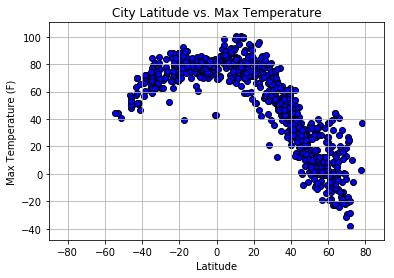

In [7]:
plt.scatter(cityDataDF["latitude"], cityDataDF["max_temp"], marker="o", color="b", edgecolor = 'black')
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.xlim(-90,90)
plt.ylim(min(cityDataDF['max_temp']-10),max(cityDataDF['max_temp']+10))
plt.grid(True)
plt.show()

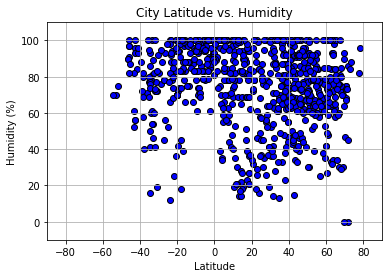

In [8]:
plt.scatter(cityDataDF["latitude"], cityDataDF["humidity"], marker="o", color="b", edgecolor = 'black')
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(-90,90)
plt.ylim(min(cityDataDF['humidity']-10),max(cityDataDF['humidity']+10))
plt.grid(True)
plt.show()

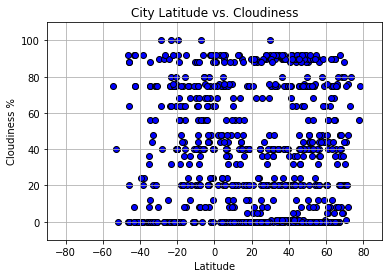

In [9]:
plt.scatter(cityDataDF["latitude"], cityDataDF["cloudiness"], marker="o", color="b", edgecolor = 'black')
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.xlim(-90,90)
plt.ylim(min(cityDataDF['cloudiness']-10),max(cityDataDF['cloudiness']+10))
plt.grid(True)
plt.show()

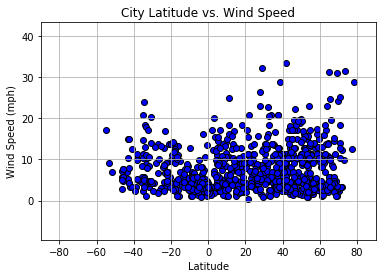

In [10]:
plt.scatter(cityDataDF["latitude"], cityDataDF["windspeed"], marker="o", color="b", edgecolor = 'black')
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.xlim(-90,90)
plt.ylim(min(cityDataDF['windspeed']-10),max(cityDataDF['windspeed']+10))
plt.grid(True)
plt.show()